In [4]:
import sys
sys.path.append('C:\\Users\\PAT\\Documents\\edwisor\\projects\\misc')
from misc import *
from misc.config import *

In [5]:
data = pd.read_csv(fs_data_path)

In [6]:
#All series type columns
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

## using selectKBest

In [8]:
iv = data.drop(['price_range'], axis =1)
dv = data['price_range']
iv.shape,dv.shape

((2000, 20), (2000,))

In [10]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(iv, dv)


In [11]:
score = pd.DataFrame(fit.scores_)
features = pd.DataFrame(iv.columns)

In [12]:
feature_select = pd.concat([features,score], axis =1)

In [13]:
feature_select.columns = ['feature', 'score']

In [16]:
feature_select.nlargest(10,'score')

,feature,score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


## Using feature_importance_ from model

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [21]:
model = ExtraTreesClassifier().fit(iv,dv)

C:\Users\PAT\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [46]:
score = pd.DataFrame(model.feature_importances_)
feature = pd.DataFrame(iv.columns)
feature_score = pd.concat([feature, score], axis =1)

In [59]:
feature_score.columns = ['feature', 'score']
feat_importances = pd.Series(model.feature_importances_, index=iv.columns)
feat_importances.plot.bar()

          feature     score
0   battery_power  0.063280
1            blue  0.018484
2     clock_speed  0.036486
3        dual_sim  0.016714
4              fc  0.028810
5          four_g  0.017907
6      int_memory  0.033693
7           m_dep  0.032569
8       mobile_wt  0.035759
9         n_cores  0.032743
10             pc  0.032956
11      px_height  0.046328
12       px_width  0.048623
13            ram  0.408916
14           sc_h  0.031049
15           sc_w  0.032200
16      talk_time  0.031748
17        three_g  0.014787
18   touch_screen  0.018680
19           wifi  0.018267


In [90]:
top_features = []
for i,j in feature_score.iterrows():
    #print(j[0])
    if i == 10:
        break
    top_features.append(j[0])
len(top_features)
top_features += ['price_range']

## Heatmap
#choose the ones with highest corelation coef with price_range

AxesSubplot(0.125,0.1925;0.62x0.62)


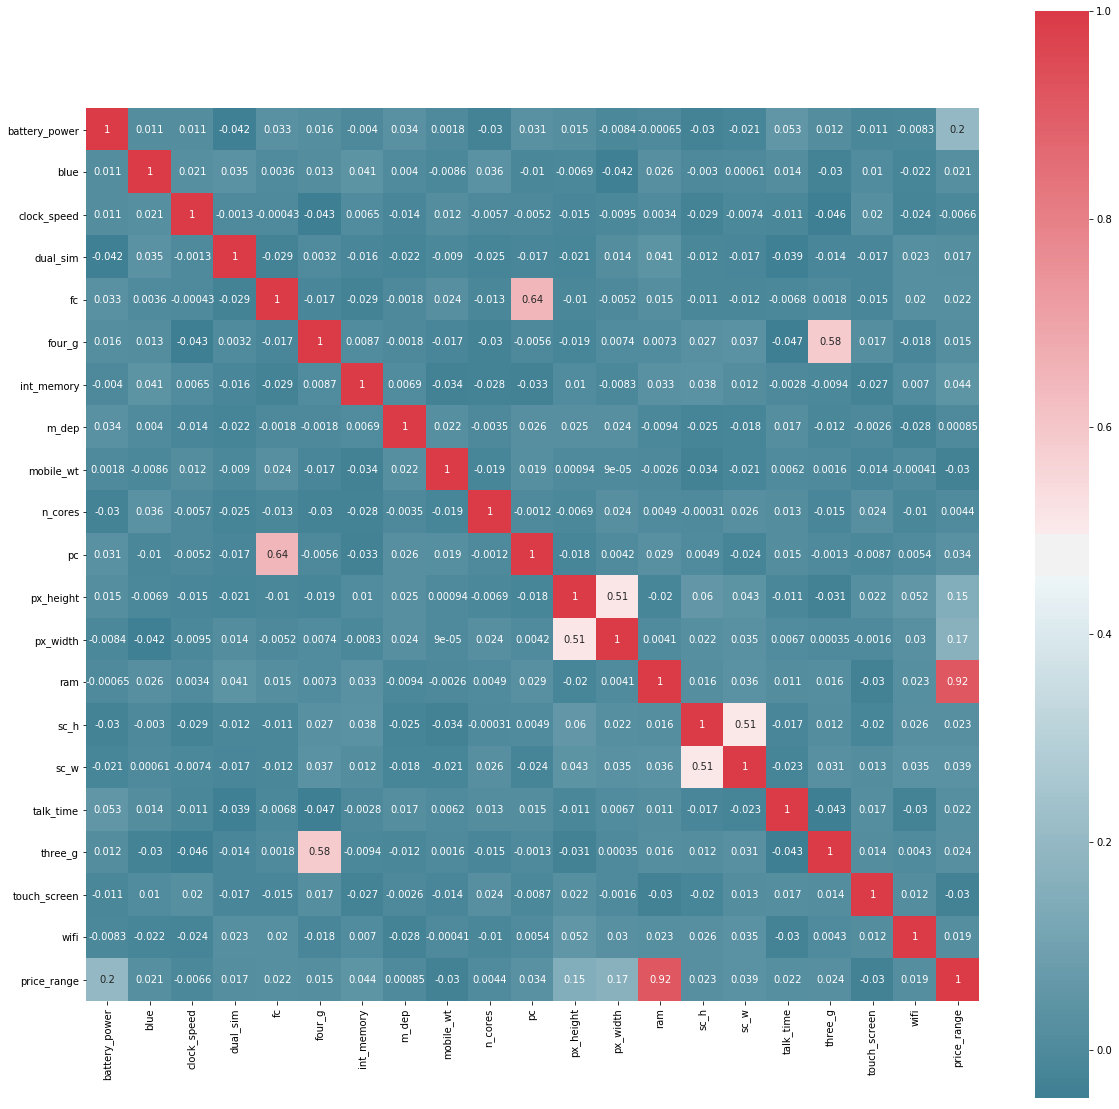

In [96]:
import seaborn  as sb
f,ax=plt.subplots(figsize=(20,20))
#data = data[top_features]#update data for only those 10 features
corr = data.corr()
print(sb.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sb.diverging_palette(220,10,as_cmap=True),
            square =True,ax=ax,annot = True))